# 사고유형예측에 관련이 적은 데이터 제거

##  격자 위치별 사고 발생 확인


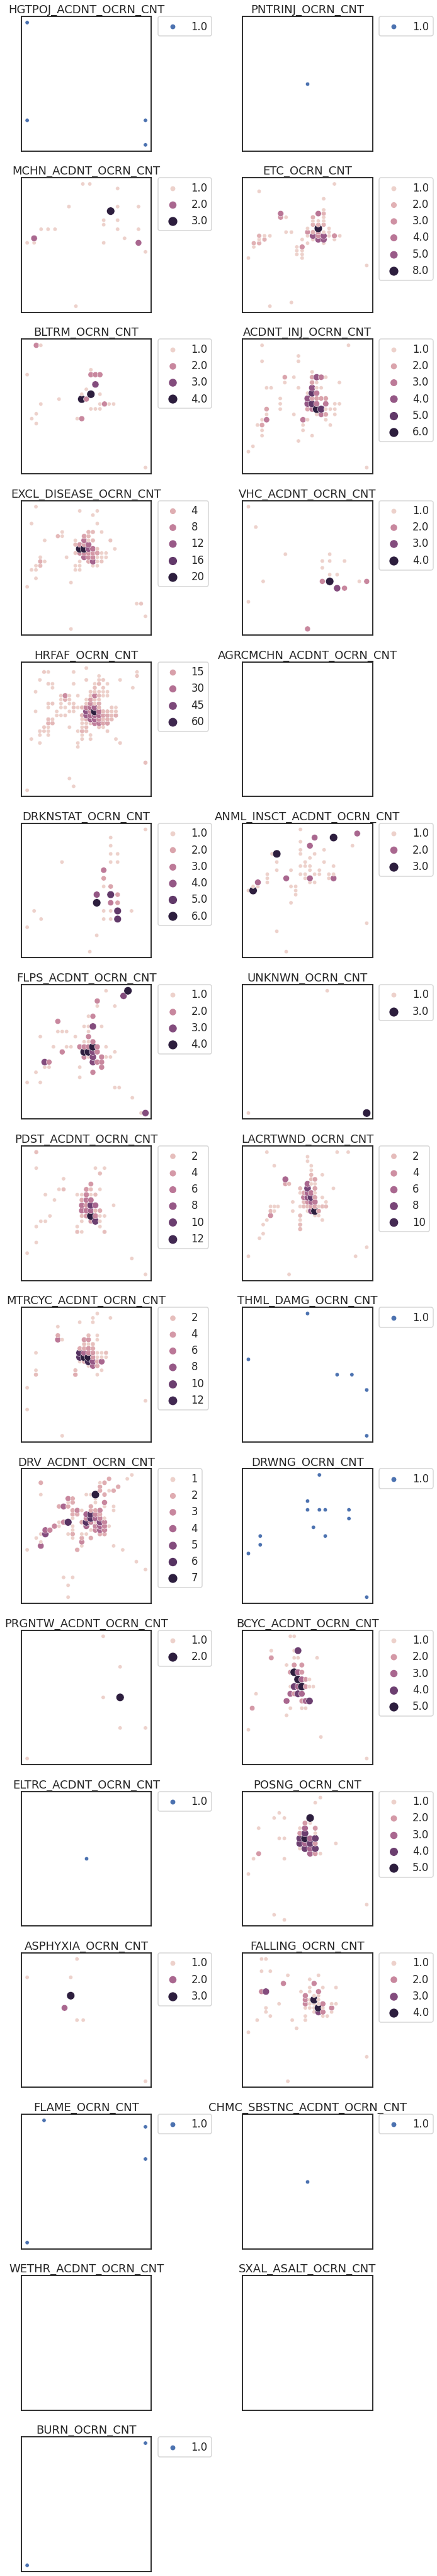

In [ ]:
#  격자 위치별 사고 발생 
plt.figure(figsize = (10, 150))
plt.subplots_adjust(wspace=0.7)   # subplot끼리 겹치지않게 보여주기
n = 0
for i in range(34,65):
    # 1건이상 발생한 사고 격자별로 합치기
    df_grid = data_DF.loc[data_DF[data_DF.columns[i]] >= 1, ["OCRN_YMD","GRID_ID",'GRID_X_AXIS',"GRID_Y_AXIS",data_DF.columns[i]]]
    df_grid = df_grid.reset_index(drop=True)
    df_grid1 = df_grid.groupby(["GRID_ID","GRID_X_AXIS","GRID_Y_AXIS"], as_index=False)[data_DF.columns[i]].sum()
    #subplot 설정
    ax = plt.subplot(32, 2, n + 1)
    plt.tick_params( axis='both', which='both', right=False, left=False,  bottom=False, top=False, labelbottom=False, labelleft=False)
    sns.scatterplot(data=df_grid1, x="GRID_X_AXIS", y = "GRID_Y_AXIS", size = data_DF.columns[i], hue = data_DF.columns[i]).plot(ax=ax)
    
    if df_grid1.iloc[:,3].sum() != 0:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #그래프 범주추가
    ax.set_title(data_DF.columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    n += 1

**15개 이하로 발생한 사고의 경우 위 격자를 확인 한 결과 우연에 의한 사고일 가능성이 높기에 제거**

* 사고 제거 리스트
  1. HGTPOJ_ACDNT_OCRN_CNT       : 고온체사고발생건     ----> 4건
  2. PNTRINJ_OCRN_CNT            : 관통상발생건수       ----> 1건
  3. AGRCMCHN_ACDNT_OCRN_CNT     : 농기계사고발생건수   ----> 0건
  4. UNKNWN_OCRN_CNT             : 미상발생건수         ----> 5건
  5. THML_DAMG_OCRN_CNT          : 온열손상발생건수     ----> 6건
  6. DRWNG_OCRN_CNT              : 익수발생건수         ----> 13건
  7. PRGNTW_ACDNT_OCRN_CNT       : 임산부사고발생건수   ----> 8건
  8. ELTRC_ACDNT_OCRN_CNT        : 전기사고발생건수     ----> 1건
  9. ASPHYXIA_OCRN_CNT           : 질식발생건수         ----> 11건
  10. FLAME_OCRN_CNT             : 화염발생건수         ----> 4건
  11. CHMC_SBSTNC_ACDNT_OCRN_CNT : 화학물질사고발생건수 ----> 1건 
  12. WETHR_ACDNT_OCRN_CNT       : 날씨사고발생건수     ----> 0건
  13. SXAL_ASALT_OCRN_CNT        : 성폭행발생건수       ----> 0건
  14. BURN_OCRN_CNT              : 화상발생건수         ----> 2건

In [ ]:
# 사고 발생건수 15건 이하인 종속변수 제거
data_DF.drop(['HGTPOJ_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['PNTRINJ_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['AGRCMCHN_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['UNKNWN_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['THML_DAMG_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['DRWNG_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['PRGNTW_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['ELTRC_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['ASPHYXIA_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['FLAME_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['CHMC_SBSTNC_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['WETHR_ACDNT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['SXAL_ASALT_OCRN_CNT'], axis=1, inplace=True)
data_DF.drop(['BURN_OCRN_CNT'], axis=1, inplace=True)

In [ ]:
# 종속변수 제거 확인 
data_DF.iloc[:, 34:].sum()

MCHN_ACDNT_OCRN_CNT           27.0
ETC_OCRN_CNT                 111.0
BLTRM_OCRN_CNT                44.0
ACDNT_INJ_OCRN_CNT           126.0
EXCL_DISEASE_OCRN_CNT        239.0
VHC_ACDNT_OCRN_CNT            28.0
HRFAF_OCRN_CNT               981.0
DRKNSTAT_OCRN_CNT             58.0
ANML_INSCT_ACDNT_OCRN_CNT     67.0
FLPS_ACDNT_OCRN_CNT          107.0
PDST_ACDNT_OCRN_CNT          158.0
LACRTWND_OCRN_CNT            176.0
MTRCYC_ACDNT_OCRN_CNT        181.0
DRV_ACDNT_OCRN_CNT           216.0
BCYC_ACDNT_OCRN_CNT           92.0
POSNG_OCRN_CNT                85.0
FALLING_OCRN_CNT              75.0
dtype: float64

In [ ]:
# 격자와 중복으로 구역을 표시하는 행정동 컬럼 삭제
data_DF.drop(["DONG_NM"], axis=1, inplace=True)
data_DF.drop(["DONG_CD"], axis=1, inplace=True)

In [ ]:
# 데이터 정리 확인 65건 -> 49건
data_DF.shape

(302168, 49)

In [ ]:
data_DF.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'OCRN_YMD', 'M00', 'M10',
       'M15', 'M20', 'M25', 'M30', 'M35', 'M40', 'M45', 'M50', 'M55', 'M60',
       'M65', 'M70', 'F00', 'F10', 'F15', 'F20', 'F25', 'F30', 'F35', 'F40',
       'F45', 'F50', 'F55', 'F60', 'F65', 'F70', 'MCHN_ACDNT_OCRN_CNT',
       'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT', 'ACDNT_INJ_OCRN_CNT',
       'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT', 'HRFAF_OCRN_CNT',
       'DRKNSTAT_OCRN_CNT', 'ANML_INSCT_ACDNT_OCRN_CNT', 'FLPS_ACDNT_OCRN_CNT',
       'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT', 'MTRCYC_ACDNT_OCRN_CNT',
       'DRV_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT', 'POSNG_OCRN_CNT',
       'FALLING_OCRN_CNT'],
      dtype='object')

## 유동인구가 없고 사고가 발생하지 않은 격자 제거

In [ ]:
# 유동인구가 없는 격자 찾기
pop_DF = pd.concat([data_DF.iloc[:, 0], data_DF.iloc[:, 5:32]], axis=1)
pdp_DF_sum = pop_DF.groupby("GRID_ID").sum() 
# 유동인구가 0인 격자 index
pop_zero = pdp_DF_sum[pdp_DF_sum.sum(axis=1) == 0].index
pop_zero = pd.DataFrame(pop_zero)
pop_zero

,GRID_ID
0,378508
1,378510
2,378515
3,378516
4,379508
...,...
376,417519
377,417520
378,418517
379,418519


In [ ]:
# 사고가 한번도 발생하지 않은 격자
acc_DF = pd.concat([data_DF.iloc[:, 0], data_DF.iloc[:, 32:]], axis=1)
acc_DF_sum = acc_DF.groupby("GRID_ID").sum() 

# 사고발생이 0인 격자 index
acc_zero = acc_DF_sum[acc_DF_sum.sum(axis=1) == 0].index
acc_zero = pd.DataFrame(acc_zero)
acc_zero

,GRID_ID
0,378508
1,378509
2,378510
3,378511
4,378512
...,...
614,417521
615,418517
616,418518
617,418519


In [ ]:
# 사고가 발생하지 않으면서 유동인구가 0인 행 제거
all_index = pd.merge(acc_zero, pop_zero, on="GRID_ID", how="inner")
data_DF = pd.merge(data_DF, all_index, how="outer", indicator=True).query('_merge == "left_only"').drop(columns=['_merge']).reset_index(drop=True)